In [3]:
import SQL as s

s.insert_into_database('analysis', 'info', 2, 345, 20)

'færdig'

In [2]:
import SQL as s

liste1, liste2, liste3 = s.retrieve_return('analysis', 'info')

In [7]:
results = list(map(int, liste1))

print(results)
print(liste1)
print(liste2)
print(liste3)

[38, 29, 139, 19, 90, 7]
['38', '29', '139', '19', '90', '7']
['1', '2', '92', '32', '72', '22']
['73', '3', '30', '80', '90', '70']


In [2]:
import SQL as s

listeId = s.retrieve_return_id('analysis', 'info')

In [4]:
print(liste)
print(listeId)

['24', '22', '10', '120', '12', '12', '12', '2']
[1, 2, 3, 4, 5, 6, 7, 8]


In [35]:
print(liste[5][0])
print(liste)

listB = []
listC = []

for i in range(0, len(liste)):
    listB.append(liste[i][0])
    
for i in range(0, len(listeId)):
    listC.append(listeId[i][0])

12
[('24', '21', '25'), ('22', '221', '245'), ('10', '382', '58'), ('120', '82', '258'), ('12', '98', '27'), ('12', '98', '27'), ('12', '98', '27'), ('2', '345', '20')]


In [36]:
print(listB)
print(listC)

['24', '22', '10', '120', '12', '12', '12', '2']
[1, 2, 3, 4, 5, 6, 7, 8]


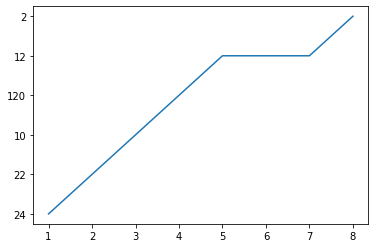

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

plt.plot(listeId, liste1) #, ylim=(0,200)

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time


def retrieve_return(database, table):  # this works
    cursor, cnx = make_SQL_cursor(database)

    #query = ("SELECT a FROM " + database + "." + table)
    query = ("SELECT a, b, c FROM analysis.info")

    cursor.execute(query)

    #aList = [value for value in cursor]
    fList = [value for value in cursor]

    aList = []
    bList = []
    cList = []

    for i in range(0, len(fList)):
        aList.append(fList[i][0])
        bList.append(fList[i][1])
        cList.append(fList[i][2])

    cursor.close()
    cnx.close()
    
    aList = list(map(int, aList))
    bList = list(map(int, bList))
    cList = list(map(int, cList))
    

    return aList, bList, cList

def make_SQL_cursor(database):
    cnx = mysql.connector.connect(user='dev', password='ax2',
                                  host='127.0.0.1',
                                  port='3307',
                                  database=database,
                                  use_pure=True)
    cursor = cnx.cursor()
    return cursor, cnx

def retrieve_return_id(database, table):  # this works
    cursor, cnx = make_SQL_cursor(database)

    query = ("SELECT id FROM " + database + "." + table)
    #query = ("SELECT a, b, c FROM analysis.info")

    cursor.execute(query)

    aList = [value for value in cursor]
    bList = []
    
    for i in range(0, len(aList)):
        bList.append(aList[i][0])

    cursor.close()
    cnx.close()

    return bList

def retrieve_return_time(database, table):  # this works
    cursor, cnx = make_SQL_cursor(database)

    query = ("SELECT time FROM " + database + "." + table)
    #query = ("SELECT a, b, c FROM analysis.info")

    cursor.execute(query)

    aList = [value for value in cursor]
    bList = []
    
    for i in range(0, len(aList)):
        bList.append(aList[i][0])

    cursor.close()
    cnx.close()

    return bList

def make_graph(database, table):
    data_list1, data_list2, data_list3 = retrieve_return('analysis', 'info')
    id_list = retrieve_return_id('analysis', 'info')
    time_list = retrieve_return_time('analysis', 'info')

    f, ax = plt.subplots()

    plt.plot(id_list, data_list1, "-b", label = "data1")
    plt.plot(id_list, data_list2, "-r", label = "data2")
    plt.plot(id_list, data_list3, "-g", label = "data3")
    plt.legend(loc="upper left")

    ax.set_xticks(id_list)
    ax.set_xticklabels(time_list)

    plt.show()


In [16]:
list1, list2, list3 = retrieve_return('analysis', 'info')
print(type(list1[0]

<class 'str'>


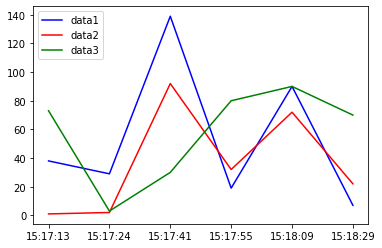

In [2]:
#import SQL as s

make_graph('analysis', 'info')

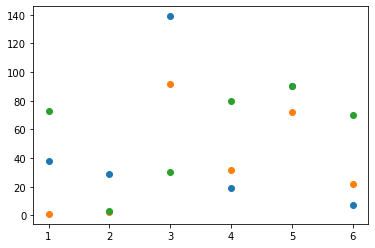

In [34]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_list1, data_list2, data_list3 = retrieve_return('analysis', 'info')
time_list = retrieve_return_time('analysis', 'info')
id_list = retrieve_return_id('analysis', 'info')

plt.scatter([id_list], [data_list1])
plt.scatter([id_list], [data_list2])
plt.scatter([id_list], [data_list3])

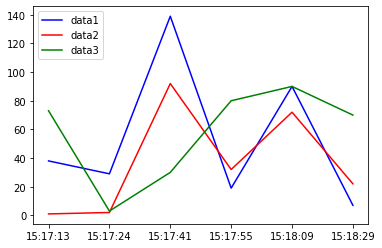

In [5]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_list1, data_list2, data_list3 = retrieve_return('analysis', 'info')
id_list = retrieve_return_id('analysis', 'info')
time_list = retrieve_return_time('analysis', 'info')

f, ax = plt.subplots()

plt.plot(id_list, data_list1, "-b", label = "data1")
plt.plot(id_list, data_list2, "-r", label = "data2")
plt.plot(id_list, data_list3, "-g", label = "data3")
plt.legend(loc="upper left")

ax.set_xticks(id_list)
ax.set_xticklabels(time_list)

plt.show()

In [22]:
import time

#localtime = time.asctime( time.localtime(time.time()) )
localtime = time.asctime( time.localtime(time.time()) )

print(localtime)

Wed May 20 15:13:16 2020


In [34]:
from datetime import datetime

now = datetime.now()
current_time = now.strftime("%H:%M:%S")

print(current_time)

15:14:56


In [35]:
import time
from datetime import datetime

localtime = time.asctime( time.localtime(time.time()) )

def insert_into_database(database, table, a, b, c):
    #a, b, c = take3Variables(a, b, c)

    cursor, cnx = make_SQL_cursor(database)
    
    #localtime = time.asctime( time.localtime(time.time()) )
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")

    query = ("INSERT INTO " + table + " VALUES (null, %s, %s, %s, %s)")

    cursor.execute(query, (a, b, c, current_time))
    
    cnx.commit()

    cursor.close()
    cnx.close()

    return 'færdig'

In [44]:
insert_into_database('analysis', 'info', 7, 22, 70)

'færdig'